Importing the dependencies

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [7]:
car_dataset = pd.read_csv('/content/car data.csv')

In [8]:
# First five rows of dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=car_dataset)

https://docs.google.com/spreadsheets/d/1AzM0-NY9FtwLGyCRLto4wzAZXNAgHcy9AihCjZwDoxo#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [10]:
# No of rows and columns
car_dataset.shape


(301, 9)

In [11]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
# Finding the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [13]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorical data

In [14]:
# encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-14-948795a53753>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-14-948795a53753>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-14-948795a53753>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

In [15]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into training data and test data

In [16]:
# Removing Car_name and Selling_price because they are not useful in prediction of car price
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1) #For column dropping axis = 1
Y = car_dataset['Selling_Price']

from google.colab import sheets
sheet = sheets.InteractiveSheet(df=X)

https://docs.google.com/spreadsheets/d/1jlKhJnG02am30e5QTqwHJN2FOPRammuEMaBcyR7IEpE#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [17]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Spliting Training and Test data

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)
# while we are stating random_state = 1 , oversampling is occuring for that reason we switch to random_state = 2

Model Training

In [19]:
lin_reg_model = LinearRegression()

Fitting the model with data

In [20]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [21]:
# Prediction on training data

In [22]:
training_data_prediction = lin_reg_model.predict(X_train)

In [23]:
# R^2 error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square Error :", error_score)

R square Error : 0.8799451660493711


Visualize the actual prices and predicted prices

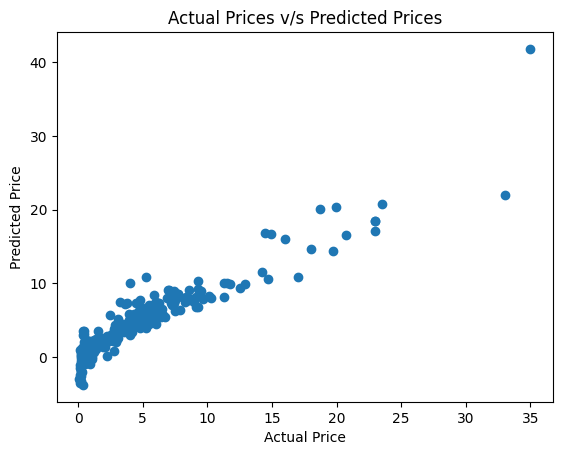

In [24]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()


In [25]:
# predicting on test data
testing_data_prediction = lin_reg_model.predict(X_test)

In [26]:
# R^2 error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R square Error :", error_score)

R square Error : 0.8365766715027051


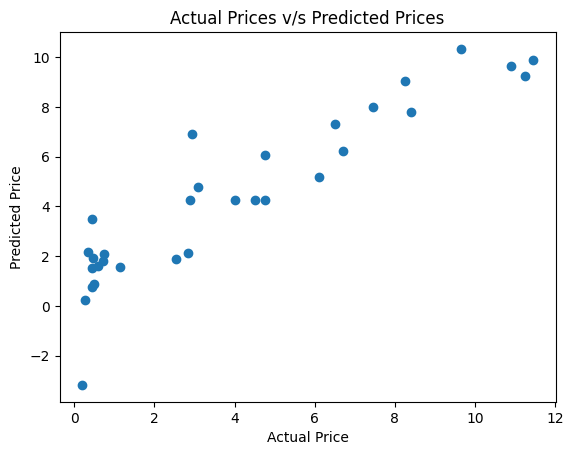

In [27]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()

Lasso Regression

In [28]:
lass_reg_model = Lasso()

Fitting the model with data

In [29]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [30]:
# Prediction on training data

In [31]:
training_data_prediction = lass_reg_model.predict(X_train)

In [32]:
# R^2 error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square Error :", error_score)

R square Error : 0.8427856123435794


Visualize the actual prices and predicted prices

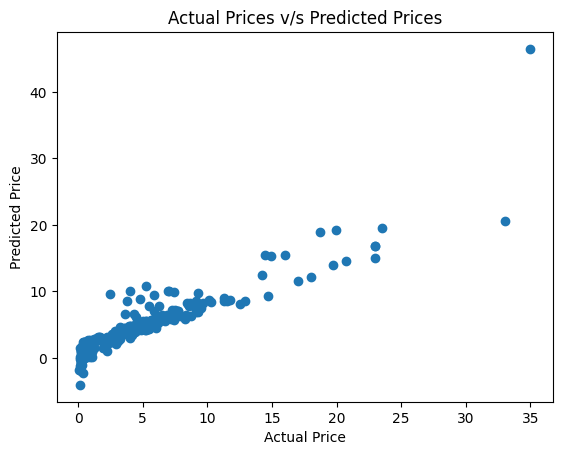

In [33]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()


In [34]:
# predicting on test data
testing_data_prediction = lin_reg_model.predict(X_test)

In [35]:
# R^2 error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R square Error :", error_score)

R square Error : 0.8365766715027051


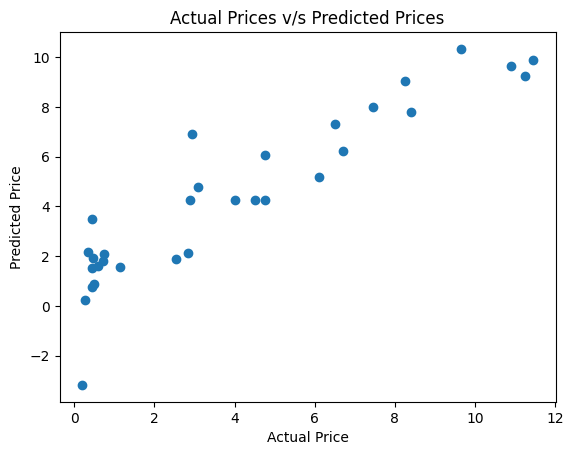

In [36]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()

XG boost Regression

In [37]:
Xg_reg_model = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

Fitting the model with data

In [38]:
Xg_reg_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:02:51] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

Model Evaluation

In [39]:
# Prediction on training data

In [40]:
training_data_prediction = Xg_reg_model.predict(X_train)

In [41]:
# R^2 error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square Error :", error_score)

R square Error : 0.9910585352183691


Visualize the actual prices and predicted prices

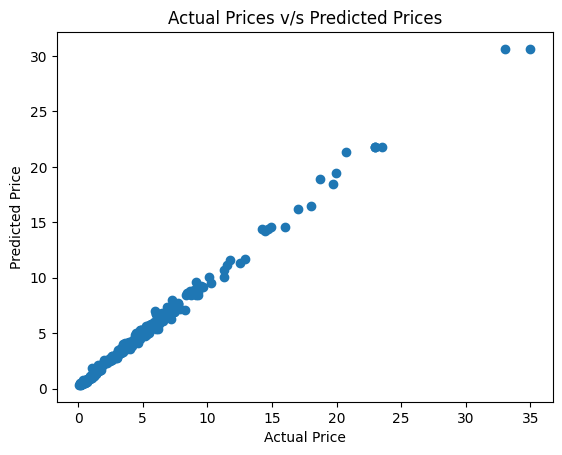

In [42]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()


In [43]:
# predicting on test data
testing_data_prediction = Xg_reg_model.predict(X_test)

In [44]:
# R^2 error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R square Error :", error_score)

R square Error : 0.9720527525895706


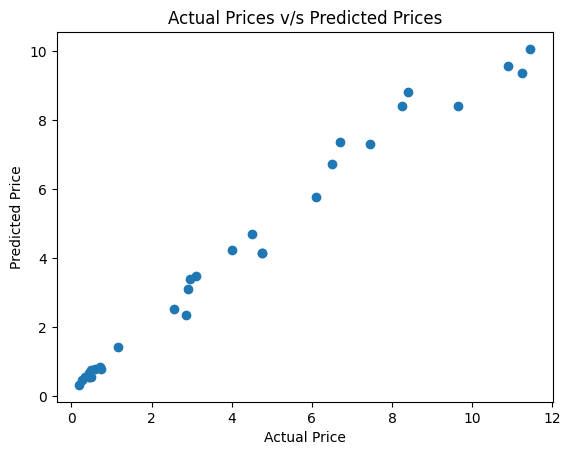

In [45]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()

In [46]:
#changing Input_data to numpy array
import numpy as np
import pandas as pd

input = pd.read_csv('/content/car data.csv')

input_data_as_numpy_array = np.asarray(input)

#reshaping the np array as we are predicting for one row only
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Result = []

for i in input:
   prediction = lin_reg_model.predict(input_data_reshaped)
   Result.append(prediction[0])

print(Result)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'ritz'